In [1]:
#Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = (14, 6)
x = np.linspace(0, 10, 101)

In [2]:
###load the temp csv data
temp_train = pd.read_csv('temp_train.csv')
temp_train.head(3)

,date,temp_c
0,1970-01-01,-12.8
1,1970-01-02,-4.9
2,1970-01-03,-1.4


In [3]:
#Make timestep column from range index - 
##the timestep gives the number of time a sample is taking
temp_train.reset_index(inplace=True)   ##reset index
temp_train.rename(columns={'index':'timestep'}, inplace=True)  ##rename the
                                    ###column as timestep
temp_train.head()

,timestep,date,temp_c
0,0,1970-01-01,-12.8
1,1,1970-01-02,-4.9
2,2,1970-01-03,-1.4
3,3,1970-01-04,-4.4
4,4,1970-01-05,-3.0


In [4]:
###convert the date to datetime and set as index
temp_train['date']=pd.to_datetime(temp_train['date'])
temp_train.set_index('date', inplace=True)
temp_train.head()



,timestep,temp_c
date,,
1970-01-01,0,-12.8
1970-01-02,1,-4.9
1970-01-03,2,-1.4
1970-01-04,3,-4.4
1970-01-05,4,-3.0


In [5]:
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18262 entries, 1970-01-01 to 2019-12-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   timestep  18262 non-null  int64  
 1   temp_c    18262 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 428.0 KB


<AxesSubplot:xlabel='date', ylabel='temp_c'>

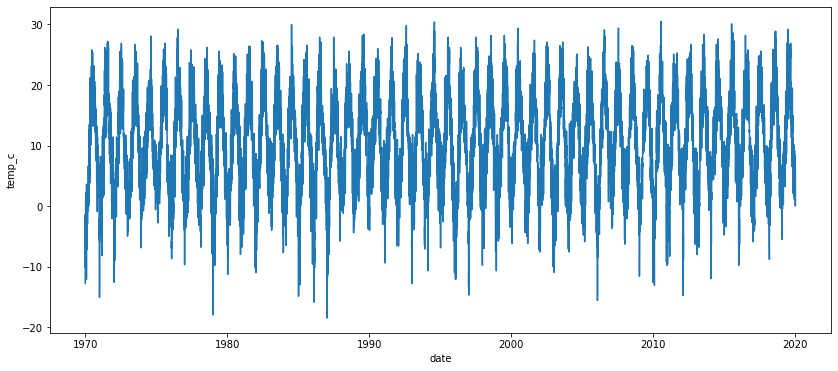

In [6]:
###plot the temperature series
sns.lineplot(data=temp_train.temp_c)

Time series data can have the following components:
1. Trend
2. Seasonality
3. Remainder - Time Dependence and Randomness
Decomposing we require accounting for all the components

In [7]:
###decompose based on the trend using linear regression
m = LinearRegression()
X = temp_train[['timestep']] 
y = temp_train['temp_c']
m.fit(X, y)

LinearRegression()

<AxesSubplot:xlabel='date', ylabel='temp_c'>

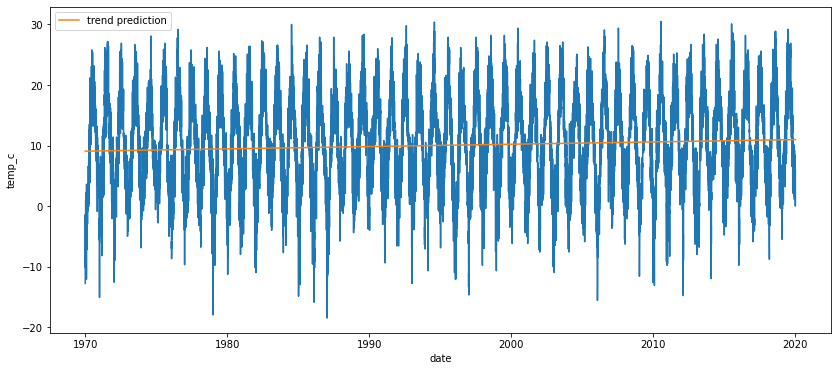

In [8]:
###plot the linear regression
sns.lineplot(data=temp_train.temp_c)
sns.lineplot(x=temp_train.index, y=m.predict(X), label='trend prediction')


In [9]:
###add the prediction based on timestep to the temp dataframe
temp_train['trend']=m.predict(X)
temp_train.head()


,timestep,temp_c,trend
date,,,
1970-01-01,0,-12.8,9.068404
1970-01-02,1,-4.9,9.068509
1970-01-03,2,-1.4,9.068613
1970-01-04,3,-4.4,9.068718
1970-01-05,4,-3.0,9.068822


In [10]:
##create feature month from datetime to model seasonality in the linear regression

temp_train['month'] = temp_train.index.month  #create month with digit
temp_train['month_name'] = temp_train.index.month_name() ##create month by name
temp_train.head()

,timestep,temp_c,trend,month,month_name
date,,,,,
1970-01-01,0,-12.8,9.068404,1,January
1970-01-02,1,-4.9,9.068509,1,January
1970-01-03,2,-1.4,9.068613,1,January
1970-01-04,3,-4.4,9.068718,1,January
1970-01-05,4,-3.0,9.068822,1,January


In [11]:
###creating month using monthh name the feature is an object, 
###month created with only month have number that dataframe see as int
##better to create month_name form datetime
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18262 entries, 1970-01-01 to 2019-12-31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestep    18262 non-null  int64  
 1   temp_c      18262 non-null  float64
 2   trend       18262 non-null  float64
 3   month       18262 non-null  int64  
 4   month_name  18262 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 856.0+ KB


In [12]:
###next we model seasonality based on month
##create a dummy variable for month_name feature
##join to the table
temp_train=pd.get_dummies(temp_train,prefix='', prefix_sep='' )
temp_train.head()

,timestep,temp_c,trend,month,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,,,
1970-01-01,0,-12.8,9.068404,1,0,0,0,0,1,0,0,0,0,0,0,0
1970-01-02,1,-4.9,9.068509,1,0,0,0,0,1,0,0,0,0,0,0,0
1970-01-03,2,-1.4,9.068613,1,0,0,0,0,1,0,0,0,0,0,0,0
1970-01-04,3,-4.4,9.068718,1,0,0,0,0,1,0,0,0,0,0,0,0
1970-01-05,4,-3.0,9.068822,1,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
###run a new linear regression with the timestep and month
##drop temp, temp_c and trend from the X
X = temp_train.drop(columns=['temp_c', 'trend']) 
y= temp_train['temp_c']

In [14]:
# Fit the model
m.fit(X,y)   ###using the same model call before

LinearRegression()

<AxesSubplot:xlabel='date', ylabel='temp_c'>

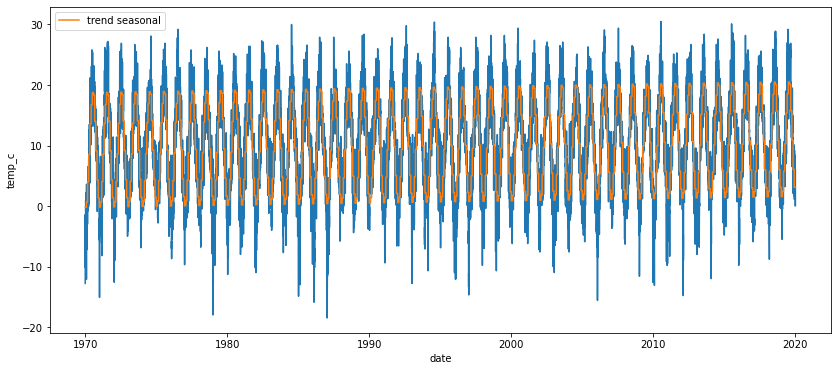

In [15]:
##plot the new grapg based on the new prediction using trend and month
sns.lineplot(data=temp_train.temp_c)
sns.lineplot(x=temp_train.index, y=m.predict(X), label='trend seasonal')

the prediction by including the seasonality gives a better result

In [16]:
####include the season trend prediction in the train_temp dataframe
temp_train['trend_seasonal'] = m.predict(X)
temp_train.head()

,timestep,temp_c,trend,month,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal
date,,,,,,,,,,,,,,,,,
1970-01-01,0,-12.8,9.068404,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219373
1970-01-02,1,-4.9,9.068509,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219274
1970-01-03,2,-1.4,9.068613,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219175
1970-01-04,3,-4.4,9.068718,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219076
1970-01-05,4,-3.0,9.068822,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.218977


In [17]:
####calculate remainder(residual)
##remainder and residual are the same
#residual is the different btw predicted y and real y
temp_train['remainder']=temp_train['temp_c'] - temp_train['trend_seasonal']
temp_train.head()

,timestep,temp_c,trend,month,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder
date,,,,,,,,,,,,,,,,,,
1970-01-01,0,-12.8,9.068404,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219373,-12.580627
1970-01-02,1,-4.9,9.068509,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219274,-4.680726
1970-01-03,2,-1.4,9.068613,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219175,-1.180825
1970-01-04,3,-4.4,9.068718,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.219076,-4.180924
1970-01-05,4,-3.0,9.068822,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.218977,-2.781023


<AxesSubplot:xlabel='date', ylabel='remainder'>

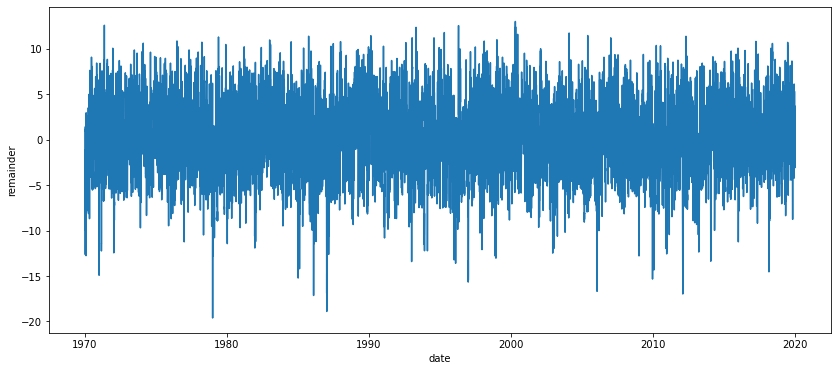

In [18]:
##plot the residual
sns.lineplot(data=temp_train.remainder)

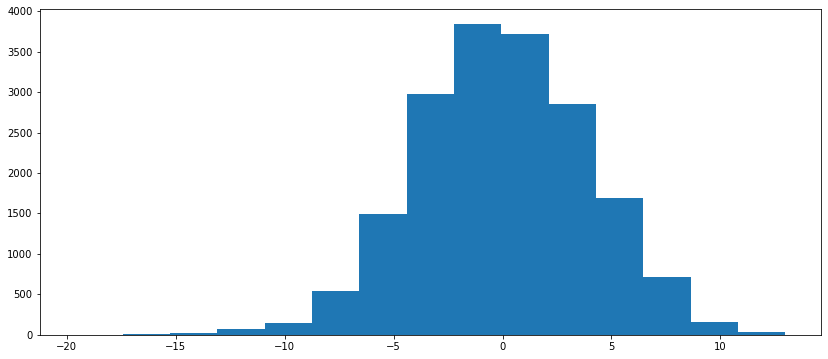

In [19]:
# plotting the distribution of the remainder

plt.hist(temp_train['remainder'], bins=15)

plt.show()

In [20]:
##check for the std and mean of data
temp_train['remainder'].std(), temp_train['remainder'].mean()

(3.929575584013518, -1.016624329591048e-15)

We can still see some pattern(time dependence) n so we need to perform under functions on the remainder
This can be done by creating a timelagged version of the remainder data

In [21]:
###save reminder to csv
temp_train['remainder'].to_csv("temp_remainder.csv")


Go to the notebook on autoregression for continuation

## `statsmodels`

Using Statsmodels we can get a quick overview of our decomposed time series:

In [22]:
#from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(temp_train['temp_c'],model='additive')

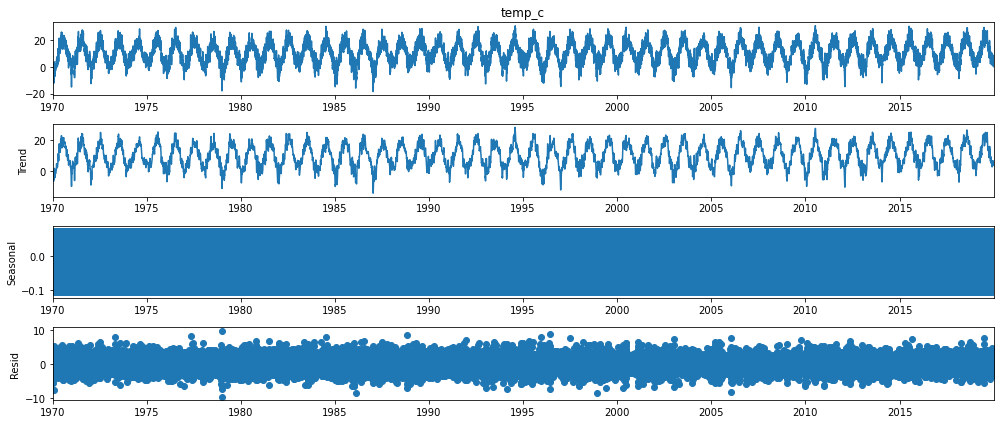

In [23]:
sd.plot()
None